# Urban Tribes Classification

## Data Preparation

In [1]:
%%time
from tools.datasets.urban_tribes import load_data

# Here we set `validation_split` and `test_split` to very small values to
# accelerate the training process. Don't do this in real runs.
(x_train, y_train), (x_val, y_val), (x_test, y_test) = \
    load_data(images_per_category=2, validation_split=3e-2, test_split=3e-2)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

Using TensorFlow backend.


x_train shape: (22, 224, 224, 3)
y_train shape: (22, 11)
CPU times: user 3.37 s, sys: 506 ms, total: 3.87 s
Wall time: 7.69 s


## Model Building

In [2]:
%%time
from tools import build_transfer_net

model = build_transfer_net(output_dim=11)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Convolution2D)     (None, 224, 224, 64)  1792        input_1[0][0]                    
____________________________________________________________________________________________________
block1_conv2 (Convolution2D)     (None, 224, 224, 64)  36928       block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_pool (MaxPooling2D)       (None, 112, 112, 64)  0           block1_conv2[0][0]               
___________________________________________________________________________________________

## Training

In [3]:
model.compile(optimizer='adadelta', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=8, nb_epoch=5,
                    validation_data=(x_val, y_val),shuffle=True)

Train on 22 samples, validate on 31 samples
Epoch 1/5
22/22 [==============================] - 64s - loss: 3.9879 - acc: 0.0909 - val_loss: 3.3126 - val_acc: 0.1613
Epoch 2/5
22/22 [==============================] - 57s - loss: 2.5123 - acc: 0.2273 - val_loss: 2.9858 - val_acc: 0.1935
Epoch 3/5
22/22 [==============================] - 53s - loss: 1.5252 - acc: 0.5000 - val_loss: 2.7937 - val_acc: 0.1613
Epoch 4/5
22/22 [==============================] - 51s - loss: 0.8587 - acc: 0.8636 - val_loss: 2.7217 - val_acc: 0.1935

In [4]:
print(model.evaluate(x_test, y_test))
print(model.metrics_names)

34/34 [==============================] - 37s    
[2.6851590100456688, 0.14705882352941177]
['loss', 'acc']


## Plotting

In [5]:
history.epoch

[0, 1, 2, 3, 4]

In [6]:
history.history

{'acc': [0.090909090909090912,
  0.2272727299820293,
  0.50000000541860412,
  0.86363636363636365,
  0.86363636905496766],
 'loss': [3.9879397695714776,
  2.51233493198048,
  1.5251725478605791,
  0.85869259725917468,
  0.50650587948885828],
 'val_acc': [0.16129032402269303,
  0.1935483899808699,
  0.16129032402269303,
  0.19354838853882206,
  0.25806451901312799],
 'val_loss': [3.3126363062089488,
  2.9857944519289079,
  2.7936644169592086,
  2.7217129891918552,
  2.6932612542183167]}

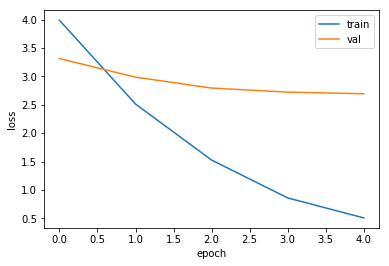

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['loss'], label='train')
plt.plot(history.epoch, history.history['val_loss'], label='val')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

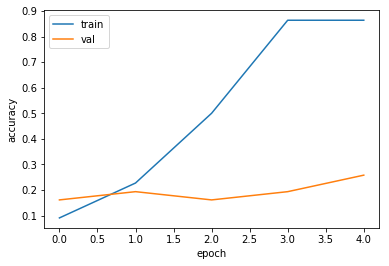

In [8]:
plt.plot(history.epoch, history.history['acc'], label='train')
plt.plot(history.epoch, history.history['val_acc'], label='val')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [9]:
from keras.models import Model
from mpl_toolkits.axes_grid1 import AxesGrid

def visualize_filter(model, layer_name, x):
    model = Model(input=model.input,
                  output=model.get_layer(layer_name).output)
    output = model.predict(x)
    
    fig = plt.figure(figsize=(12, 12))

    grid = AxesGrid(fig, 111,
                    nrows_ncols=(8, 8),
                    axes_pad=0.0,
                    share_all=True,
                    label_mode="L",
                    cbar_location="top",
                    cbar_mode="single")

    for i in range(64):
        im = grid[i].imshow(output[0, :, :, i], interpolation="nearest")
    grid.cbar_axes[0].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(False)

    for ax in grid.axes_all:
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

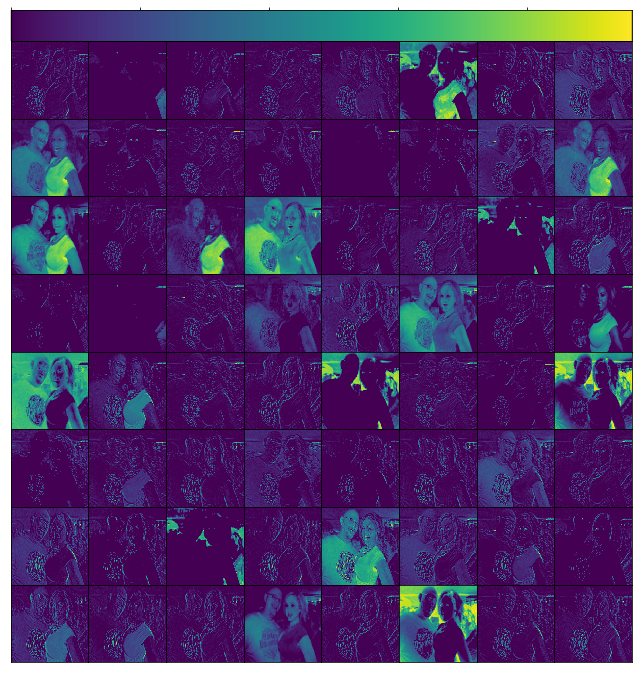

In [10]:
# first convolution layer
visualize_filter(model, 'block1_conv1', x_train[0:1])

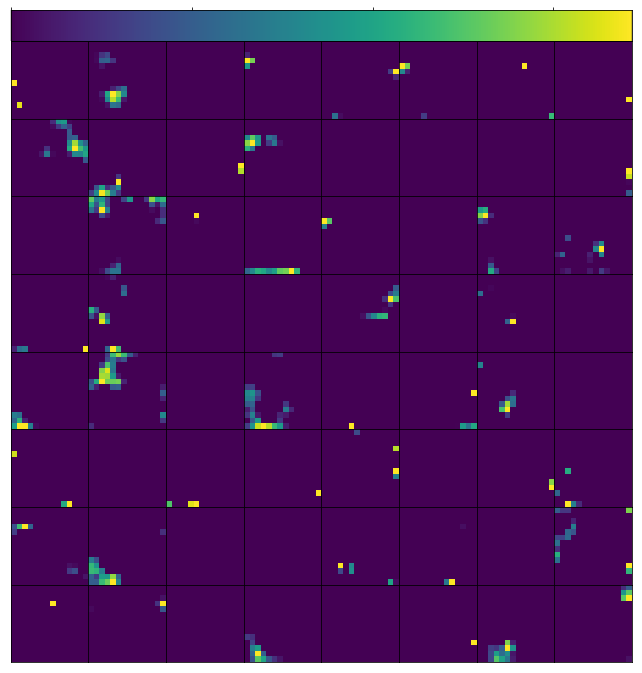

In [11]:
# last convolution layer
visualize_filter(model, 'block5_conv3', x_train[0:1])